# MERCS SCORE SAMPLES

Now for the moment we have all been waiting for.

## Preliminaries

In [1]:
# Basic imports
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import sys


from os.path import dirname
from sklearn.tree import *
from sklearn import datasets 
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
note_dir = os.getcwd()
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, 'src')

sys.path.extend([src_dir])

In [3]:
import mercs
from mercs.core import MERCS

## Datasets

In [4]:
np.random.seed(16)
n_samples = 1500

In [5]:
#data = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
data = datasets.make_moons(n_samples=n_samples, noise=.05)

#data = datasets.make_blobs(n_samples=n_samples, random_state=8)


#transformation = [[0.6, -0.6], [-0.4, 0.8]]
#data = (np.dot(data[0], transformation), data[1])
#data = ((data[0]+10)/20, data[1])



In [6]:
anomalies = np.random.rand(n_samples, 2)

In [7]:
data[0]

array([[ 0.81640639,  0.45959391],
       [ 1.15278267, -0.44977804],
       [ 0.95784551,  0.14440154],
       ...,
       [ 0.79414006,  0.4485469 ],
       [ 1.6108386 , -0.37949768],
       [-1.01160515,  0.37818447]])

In [8]:
X = data[0]
y = data[1]
#X = np.concatenate((data[0], anomalies[:50]))
#y = np.concatenate((data[1], np.zeros(50)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = MERCS()

In [10]:
ind_parameters = {'ind_type':                   'DT',
                  'ind_min_samples_leaf':       5,
                  'ind_marginal_kdes':          True,
                  'ind_joint_kdes':             True}

sel_parameters = {'sel_type':           'Base',
                  'sel_its':            10,
                  'sel_param':          1}



In [11]:
model.fit(X_train, **ind_parameters, **sel_parameters)


In [12]:
model.fit_scores_scaler(X_train, kind='Robust')

In [13]:
plot_data = X_train
plot_data = np.random.rand(n_samples, 2)*3-1
#plot_data = np.concatenate((X_train, np.dot(X_train, [[0.5, -0.02], [-0.02, 0.8]])-0.25))
#plot_data = X_test

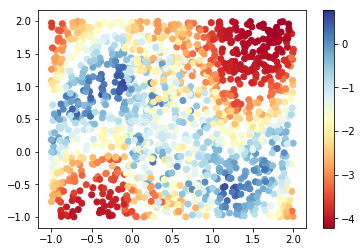

In [14]:
scores = model.score_samples(plot_data, kde_kind='marginal', aggregation='mean')

# Plot the results
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(plot_data[:, 0], plot_data[:, 1], c=scores, cmap=cm)
plt.colorbar(sc)
plt.show()

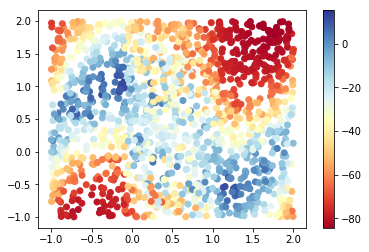

In [15]:
scores = model.score_samples(plot_data, kde_kind='marginal', aggregation='sum')

# Plot the results
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(plot_data[:, 0], plot_data[:, 1], c=scores, cmap=cm)
plt.colorbar(sc)
plt.show()

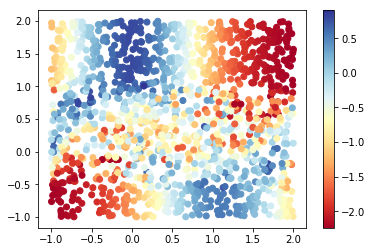

In [16]:
scores = model.score_samples(plot_data, kde_kind='marginal', aggregation='max')

# Plot the results
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(plot_data[:, 0], plot_data[:, 1], c=scores, cmap=cm)
plt.colorbar(sc)
plt.show()

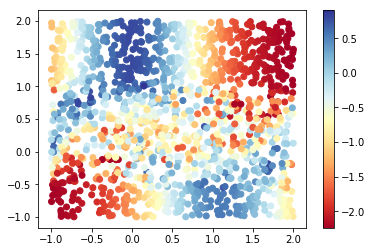

In [25]:
scores = model.score_samples(plot_data, kde_kind='marginal', aggregation='topk', k=10)

# Plot the results
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(plot_data[:, 0], plot_data[:, 1], c=scores, cmap=cm)
plt.colorbar(sc)
plt.show()

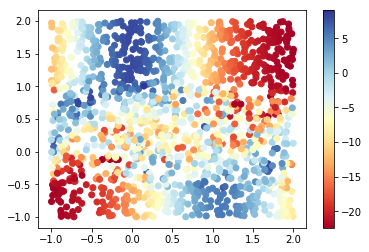

In [18]:
scores = model.score_samples(plot_data, kde_kind='joint', aggregation='topksum', k=10)

# Plot the results
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(plot_data[:, 0], plot_data[:, 1], c=scores, cmap=cm)
plt.colorbar(sc)
plt.show()

In [19]:


noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1


<Figure size 1368x684 with 0 Axes>

In [20]:
plt.show()